In [10]:
#KMeans
from konlpy.tag import Hannanum
import pandas as pd

han = Hannanum()
df = pd.read_csv('c:/data/text/군집분석데이터.csv.', engine='python', encoding='ms949')

In [11]:
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [12]:
docs = []
for i in df['기사내용']:
    #명사만 추출
    docs.append(han.nouns(i))

for i in range(len(docs)):
    #명사들 사이에 공백을 붙여서 열거
    docs[i] = ' '.join(docs[i])

print(docs[:1])

['유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성']


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
#BOW를 이용한 문서 - 단어 행렬 생성
# 문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어서 인코딩한 벡터를 생성
vec = CountVectorizer()
X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

print(df2.head())

   10대  10배  10분  12억500  12억500만달러  12억5500  12억5500만달러  12억5천500  15명  16  \
0    0    0    0       0          1        0           1         0    0   0   
1    0    0    0       1          0        0           1         0    0   0   
2    0    0    0       1          0        1           0         0    0   0   
3    0    0    0       1          0        0           0         1    0   0   
4    0    0    0       0          0        0           1         0    0   0   

   ...  협조  호소력  홈페이지  확대  확인  확충  환경부  활동  후보물질  흡연  
0  ...   0    0     0   0   0   0    0   0     0   0  
1  ...   0    0     0   0   0   0    0   0     0   0  
2  ...   0    0     0   0   0   0    0   0     0   0  
3  ...   0    0     0   0   0   0    0   0     0   0  
4  ...   0    0     0   0   0   0    0   0     1   0  

[5 rows x 581 columns]


In [16]:
from sklearn.cluster import KMeans
#군집 개수(n_clusters)를 3으로 설정
kmeans = KMeans(n_clusters=3, random_state=10).fit(df2)

print(kmeans.labels_)
len(kmeans.labels_)

[1 1 1 1 1 1 0 0 0 0 2 2 2 2 2]


15

          compnent 1  component 2
검색어                              
유한양행       -2.245408    -4.167447
유한양행       -3.613940    -9.898629
유한양행       -2.932638    -7.159346
유한양행       -2.142776    -3.757097
유한양행       -3.397887    -8.904249
라돈         -3.456162     0.931168
라돈         -4.172638     2.527021
라돈         -6.418891     7.240856
라돈         -7.928541    10.011257
라돈         -7.161775     8.881843
복면가왕 왕밤빵   20.296606     4.548939
복면가왕 왕밤빵    4.186122    -0.501075
복면가왕 왕밤빵    9.931536     1.068590
복면가왕 왕밤빵    6.580160    -0.003793
복면가왕 왕밤빵    2.476233    -0.818038


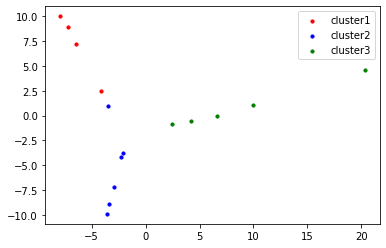

In [15]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#플로팅을 위하여 ca 기법(주성분분석)으로 차원을 2차원으로 축소
pca = PCA(n_components=2, random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data = components, columns=['compnent 1', 'component 2'])

df3.index=df['검색어']
print(df3)
kmeans.labels_ == 0

# x축 : first, y축 : second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[kmeans.labels_ == 0,0],
df3.iloc[kmeans.labels_ == 0, 1],
s = 10, c = 'red', label = 'cluster1')

plt.scatter(df3.iloc[kmeans.labels_ == 1,0],
df3.iloc[kmeans.labels_ == 1, 1],
s = 10, c = 'blue', label = 'cluster2')

plt.scatter(df3.iloc[kmeans.labels_ == 2,0],
df3.iloc[kmeans.labels_ == 2, 1],
s = 10, c = 'green', label = 'cluster3')

plt.legend()

In [18]:
#KMeans - 뉴스분석

import pandas as pd
df = pd.read_csv('c:/data/text/news.csv')

In [19]:
df.head()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count
0,1,“2028학년도에 수시·정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,2019-02-15 02:42:56.000000,0,4,https://pds.joins.com/news/component/htmlphoto...,"대입,교수,수능,시기,학년도",0,0,0,0,“수시·정시 통합해야” vs “수능 무력화 의도”…2028 대입 두고 논란,2019-02-16 17:50:04.872868,https://news.joins.com/article/23373597,0
1,1,최근 열린 삼보국가대표 선발전에서 1위를 한 뒤. 신재용 씨 제공\n\n고교 국가대...,2019-02-16 05:00:00.000000,1,5,http://dimg.donga.com/a/600/0/90/5/wps/NEWS/IM...,"공부,운동,유도,때,대회",0,-2,0,0,“공부하겠다는 내게 감독님이 열쇠 주셔” 서울대 가서도 유도-삼보로 꿈 키워 [양종...,2019-02-16 17:50:05.303722,http://news.donga.com/3/all/20190216/94152869/1,1
2,1,/첨부용/연세대 수험생 대나무숲\n\n우체국 전산 오류로 등록금을 못 내 연세대 합...,2019-02-13 15:00:00.000000,0,6,http://image.chosun.com/sitedata/image/201902/...,"수험,우체국,등록금,글,해당",0,0,0,0,"""등록금 전산 오류로 연대 합격 취소"" 책임 갑론을박",2019-02-16 17:50:05.412111,http://news.chosun.com/site/data/html_dir/2019...,0
3,1,"교육당국, 갑자기 통과 기준 점수 대폭 올려… 폐지 논란 재점화\n\n자사고聯, 교...",2019-02-15 15:00:00.000000,0,7,http://image.chosun.com/sitedata/image/201902/...,"자사고,평가,기준,지표,교육부",2,4,0,0,"""또 자사고 죽이기냐"" 再지정 문턱 높이자 폭발한 학교들",2019-02-16 17:50:05.495572,http://news.chosun.com/site/data/html_dir/2019...,2
4,1,[베리타스알파=권수진 기자] 14일 오후9시 마감한 상위9개대학(고려대 동국대 서강...,2019-02-15 07:37:32.000000,0,8,http://cds.veritas-a.com/news/photo/201902/144...,"충원,모집,추합,과,교육",0,0,0,0,[2019정시충원율] 상위9개대학 57.9%.. ‘상승’.. 추합 4159명,2019-02-16 17:50:06.153964,http://www.veritas-a.com/news/articleView.html...,0


In [20]:
df.tail()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count
9670,2,"[美北 하노이 회담 결렬 후 뉴스 보도]\n\n""김정은, 능수능란한 외교적 언사… ...",2019-03-04 15:00:00.000000,0,9674,http://image.chosun.com/sitedata/image/201903/...,"회담,트럼프,결렬,보도,협상",0,0,0,0,"'트럼프는 오만, 김정은은 노련'하다는 지상파",2019-03-05 00:50:48.177623,http://news.chosun.com/site/data/html_dir/2019...,0
9671,2,북한이 하노이 2차 북미정상회담이 진행되고 있는 중에도 우라늄농축시설을 가동하고 있...,2019-03-04 15:00:00.000000,0,9675,http://image.chosun.com/facebook/newson.png,"농축,시설,생산,우라늄,가동",0,0,0,0,"""北, 하노이 회담 중에도 영변 우라늄 고농축 시설 가동"" IAEA",2019-03-05 00:50:49.001492,http://news.chosun.com/site/data/html_dir/2019...,0
9672,3,그룹 빅뱅 멤버 승리가 경찰 출신 변호사를 선임한 것으로 전해졌다.\n\n법조계에 ...,2019-03-05 08:55:35.000000,0,9676,http://newsimg.hankookilbo.com/2019/03/05/2019...,"승리,경찰,의혹,지난달,성접대",0,0,0,0,"승리, 경찰 출신 변호사 선임…권익위, 성접대 의혹 카톡 확보",2019-03-05 00:50:49.977485,http://www.hankookilbo.com/News/Read/201903050...,0
9673,3,그룹 인피니트 장동우가 데뷔 때 소속사에서 정한 목표가 동방신기였다고 밝혔다.장동우...,2019-03-05 00:50:50.000000,0,9677,http://pds.joins.com/news/component/htmlphoto_...,"앨범,보컬,인피니트,데뷔,동방",0,0,0,0,"인피니트 장동우, ”인피니트 데뷔 때 목표, 동방신기”",2019-03-05 00:50:50.437183,http://isplus.joins.com/article/160/23401160.h...,0
9674,3,스티븐 스필버그가 넷플릭스의 아카데미 시상식 참여에 제동을 걸었다. 넷플릭스 작품은...,2019-03-04 02:15:41.000000,0,9678,https://img.huffingtonpost.com/asset/5c7c89f82...,"아카데미,시상식,영화,작품,이사회",0,0,0,0,스티븐 스필버그는 여전히 넷플릭스 작품은 아카데미 후보 자격이 없다고 생각한다,2019-03-05 00:51:09.847226,https://www.huffingtonpost.kr/entry/story_kr_5...,0


In [21]:
df.columns

Index(['category', 'content', 'date', 'hate', 'id', 'image', 'keyword', 'like',
       'rate', 'skip', 'sub_category', 'title', 'update_date', 'url',
       'view_count'],
      dtype='object')

In [22]:
#클래스별 샘플 갯수
df['category'].value_counts()

2    4682
1    2872
3    2121
Name: category, dtype: int64

In [23]:
# 카테고리가 1인 뉴스만 선택(교육관련 기사)
# df = df[df['category'] == 1]

In [25]:
import re

# ^[ ] start, [^ ] not, 한글/영문자만 허용
def preprocessing(sentence):
    sentence = re.sub('[^r가-힣ㄱ-ㅎㅏ-ㅣ a-zA-Z]', ' ', sentence)
    return sentence

#content 필드에 preprocessing 함수 적용
df['content_cleaned'] = df['content'].apply(preprocessing)
content = df['content_cleaned'].tolist()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 인코딩한 벡터를 생성
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

In [27]:
from sklearn.preprocessing import normalize
# 12 정규화
# 아주 큰 값이나 아주 작은 값을 가지는 outlier에 대해 0에 가까운 값으로 만드는 방식
X = normalize(X)

In [28]:
from sklearn.cluster import KMeans
# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=3, random_state=10).fit(X)

In [29]:
#labels에 merge
#df['labels'] = kmeans.labels_
print(kmeans.labels_)

[2 2 2 ... 2 2 2]


In [30]:
#구조적 클러스터링
#트리 형태의 군집으로 나누는 방법
# 개별대상간의 거리에 의하여 가장 가까이에 있는 대상들로부터 시작하여 결합,
# 트리 모양의 계층구조를 형성하는 방법

In [32]:
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum() #한나눔 분석기

df = pd.read_csv('c:/data/text/군집분석데이터.csv', encoding='ms949')
df.head()


,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

doc = []
for i in df['기사내용']:
    #명사 추출
    docs.append(hannanum.nouns(i))

#단어에 공백을 추가
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

vec = CountVectorizer()
X = vec.fit_transform(docs)

df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

print(df2.head())

   10대  10배  10분  12억500  12억500만달러  12억5500  12억5500만달러  12억5천500  15명  16  \
0    0    0    0       0          0        0           0         0    0   0   
1    0    0    0       0          0        0           0         0    0   0   
2    0    0    0       0          0        0           0         0    0   0   
3    0    0    0       0          0        0           0         0    0   0   
4    0    0    0       0          0        0           0         0    0   0   

   ...  협조  호소력  홈페이지  확대  확인  확충  환경부  활동  후보물질  흡연  
0  ...   0    0     0   0   0   0    0   0     0   0  
1  ...   0    0     0   0   0   0    0   0     0   0  
2  ...   0    0     0   0   0   0    0   0     0   0  
3  ...   0    0     0   0   0   0    0   0     0   0  
4  ...   0    0     0   0   0   0    0   0     0   0  

[5 rows x 581 columns]


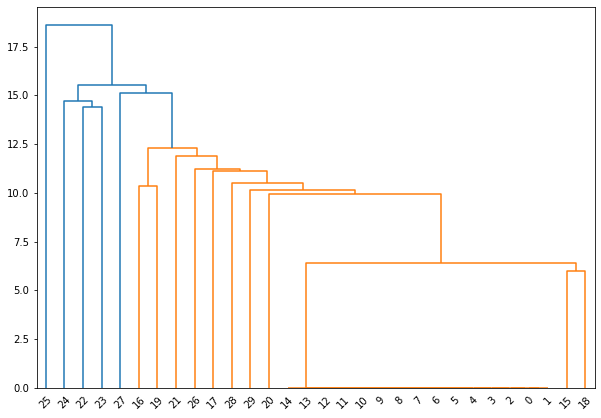

In [34]:
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

#계층적 클러스터링 : 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여가는 방법
# 클러스터 수를 3으로 설정

cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(df2)

#덴드로그램 출력, 트리를 나타내는 다이어그램
plt.figure(figsize=(10,7))
result = shc.linkage(df2)
shc.dendrogram(result)
plt.show()